# Laboratorium 6

Przetwarzanie obrazów

Martyna Toborek 311843

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
import imageio

import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15, 8)

W tym sprawozdaniu należy poddać analizie obraz w formie czarno-białej. Będzie wykorzystywana transformata cosinusowa DCT (discrete cosine transform) oraz transformata Fouriera FFT.

W poniższej komórce wyśweitlamy oryginalny obrazek.

C:\Users\tynka\AppData\Local\Temp\ipykernel_17980\3457458362.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('imageio:coins.png')


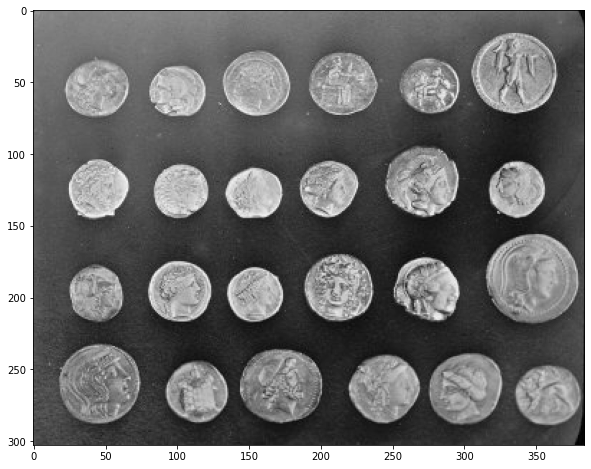

In [94]:
im = imageio.imread('imageio:coins.png')
f=plt.figure()
plt.imshow(im, cmap='gray')

Następnie definiujemy dwuwymiarową transformatę cosinusową (dct2) oraz odwrotną transormatę cosinusową (idct2). 

In [95]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

W poniższej komórce dokonujemy DCT na obrazie wybierając blok o rozmiarze 8x8.

In [96]:
imsize = im.shape
dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

W poniższej komórce wyświetlamy obraz wybranego bloku 8x8 oraz ten obraz po zastosowaniu DCT.

Text(0.5, 1.0, 'Blok DCT 8x8 ')

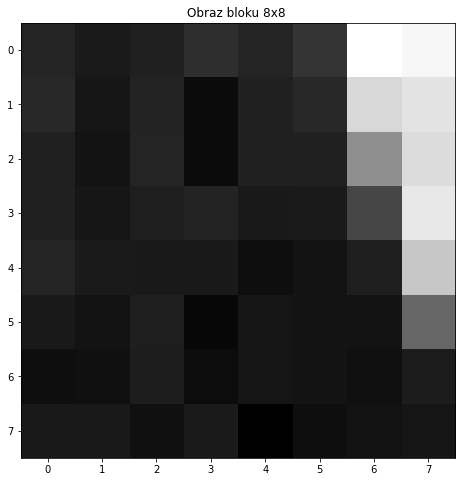

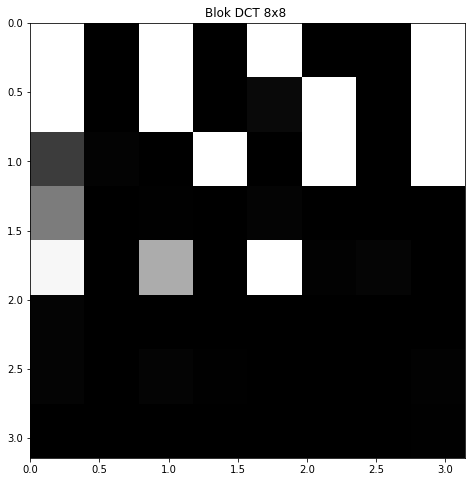

In [97]:
pos = 128

plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "Obraz bloku 8x8 ")

plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "Blok DCT 8x8 ")

Następnie wyświetlamy cały obraz po zastosowaniu DCT złożony z bloków 8x8.

Text(0.5, 1.0, '8x8 DCT obrazu')

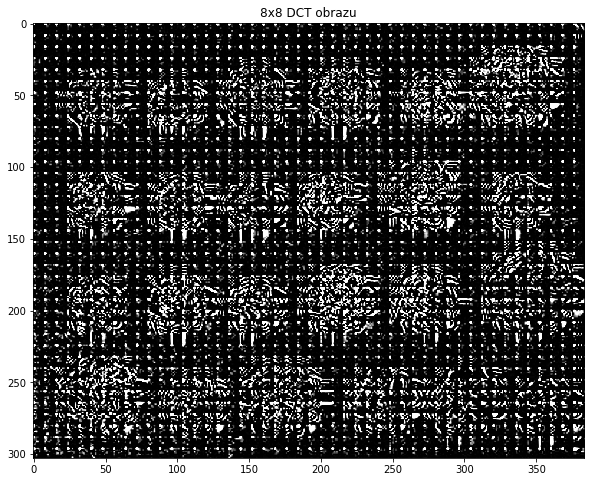

In [98]:
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCT obrazu")

W następnej komóce wyśweitlamy bloki, której wyniki transformaty są wyższe niżeli ustalony próg (thresh).

Pozostało 14.926258% współczynników DCT


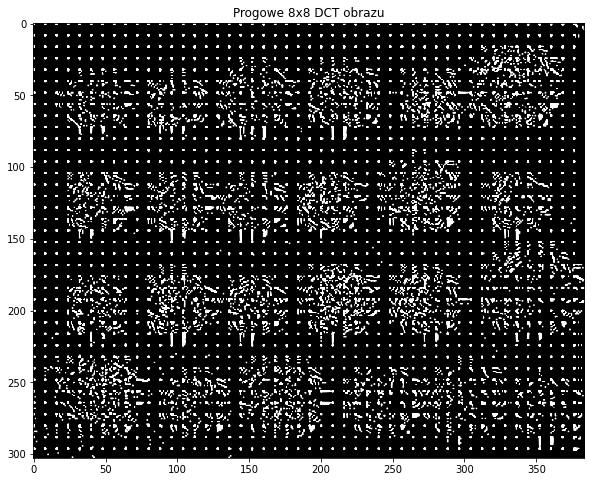

In [99]:
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Progowe 8x8 DCT obrazu")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Pozostało %f%% współczynników DCT" % (percent_nonzeros*100.0))

Zauważamy, że liczba współczynników transformaty jest dużo większa niżeli liczba współczynników transformaty po zastosowaniu progu. 

W poniższej komórce porównujemy obraz skompresowany (czyli po zastosowaniu progu) z oryginalnym obrazem. Aby było to możliwe należy zastosować odwortną transformatę cosinusową (idct2). 

Text(0.5, 1.0, 'Porównanie obrazu oryginalnego oraz skompresowanego DCT')

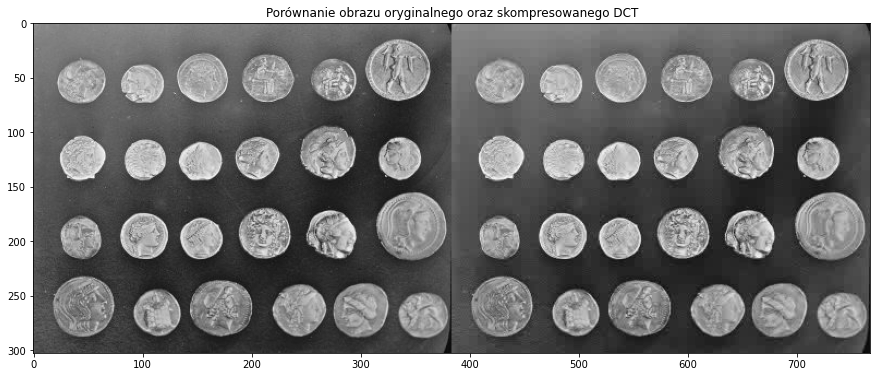

In [100]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Porównanie obrazu oryginalnego oraz skompresowanego DCT" )

Poniżej wyświetlamy obraz po zastosowaniu transformaty FFT na całym obrazku.

Text(0.5, 1.0, '8x8 DFT obrazu')

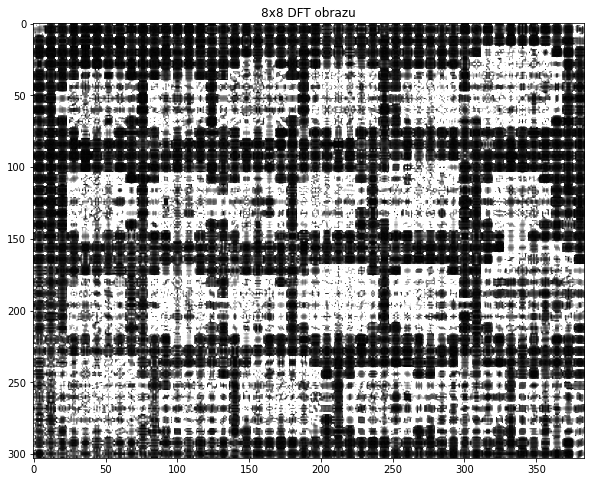

In [111]:
dft = zeros(imsize,dtype='complex')
im_dft = zeros(imsize,dtype='complex')

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2( im[i:(i+8),j:(j+8)] )

thresh = 0.013
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )
        
plt.figure()
plt.imshow(abs(dft),cmap='gray',vmax = np.max(abs(dft))*0.01,vmin = 0)
plt.title( "8x8 DFT obrazu")
        

Następnie do porównania dodajemy obraz po kwantyzacji dwuwymiarową transformatą Fouriera, skompresowaniu tym samym progiem oraz przepuszczeniu przez odwrotną transformatę Fouriera.

Pozostało 14.926258% współczynnikó DCT
Pozostało 16.614240% współczynników DFT


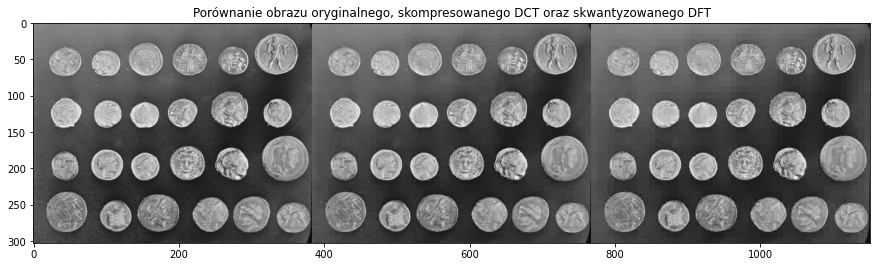

In [110]:
percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print ("Pozostało %f%% współczynnikó DCT" % (percent_nonzeros*100.0))
print ("Pozostało %f%% współczynników DFT" % (percent_nonzeros_dft*100.0))
        
plt.figure()
plt.title("Porównanie obrazu oryginalnego, skompresowanego DCT oraz skwantyzowanego DFT" )
plt.imshow( np.hstack( (im, im_dct, abs(im_dft)) ) ,cmap='gray')


Zauważamy, że ilość pozostałych współczynników transformaty przy użyciu transformaty FFT jest większa niżeli przy użyciu transformaty DCT.

Jesteśmy w stanie zauważyć znaczną różnicę w obrazach po zastosowaniu transformaty DCT oraz FFT. Obraz po zastosowaniu transformaty FFT jest jaśniejszy oraz bardziej widoczny.

Następnie wykonujemy to samo dla innej wielkości bloku - 16x16

Pozostało 6.562844% współczynników DCT


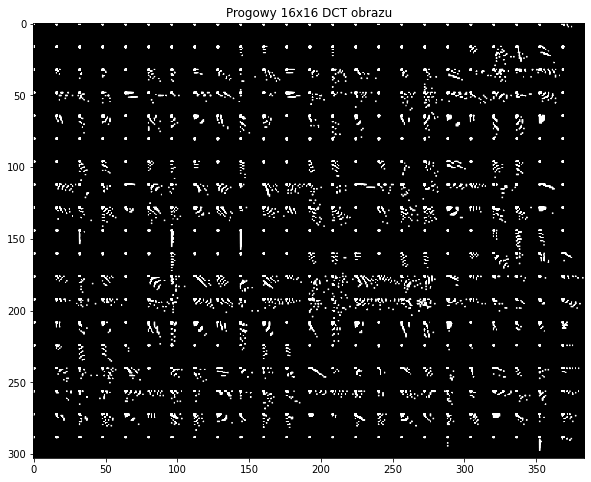

In [103]:
imsize = im.shape
dct_2 = np.zeros(imsize)

for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        dct_2[i:(i+16),j:(j+16)] = dct2( im[i:(i+16),j:(j+16)] )
        
thresh = 0.012
dct_thresh_2 = dct_2 * (abs(dct_2) > (thresh*np.max(dct_2)))

im_dct_2 = np.zeros(imsize)

for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        im_dct_2[i:(i+16),j:(j+16)] = idct2( dct_thresh_2[i:(i+16),j:(j+16)] )

plt.figure()
plt.imshow(dct_thresh_2,cmap='gray',vmax = np.max(dct_2)*0.01,vmin = 0)
plt.title( "Progowy 16x16 DCT obrazu")

percent_nonzeros_2 = np.sum( dct_thresh_2 != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print ("Pozostało %f%% współczynników DCT" % (percent_nonzeros_2*100.0))

Możemy zauważyć, że zostało wycięte jeszcze więcej obrazu. 

Text(0.5, 1.0, '16x16 DFTs  obrazu')

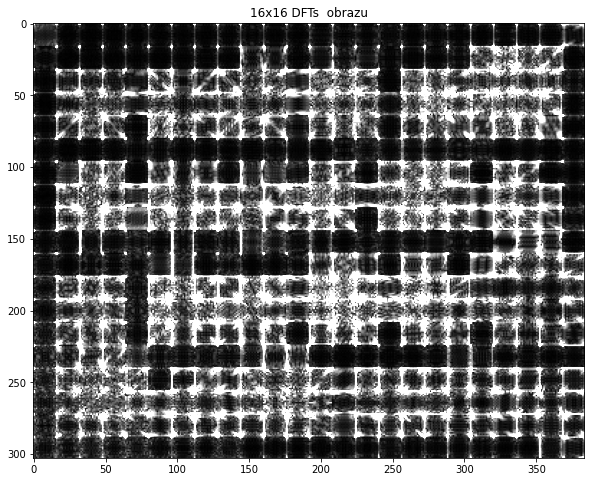

In [114]:
dft_2 = zeros(imsize,dtype='complex')
im_dft_2 = zeros(imsize,dtype='complex')

for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        dft_2[i:(i+16),j:(j+16)] = np.fft.fft2( im[i:(i+16),j:(j+16)] )

thresh = 0.013
dft_thresh_2 = dft_2 * (abs(dft_2) > (thresh*np.max(abs(dft_2))))




for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        im_dft_2[i:(i+16),j:(j+16)] = np.fft.ifft2( dft_thresh_2[i:(i+16),j:(j+16)] )
        
plt.figure()
plt.imshow(abs(dft_2),cmap='gray',vmax= np.max(abs(dft_2))*0.01,vmin = 0)
plt.title( "16x16 DFTs  obrazu")

Pozostało 6.562844% współczynnikó DCT
Pozostało 7.654359% współczynników DFT


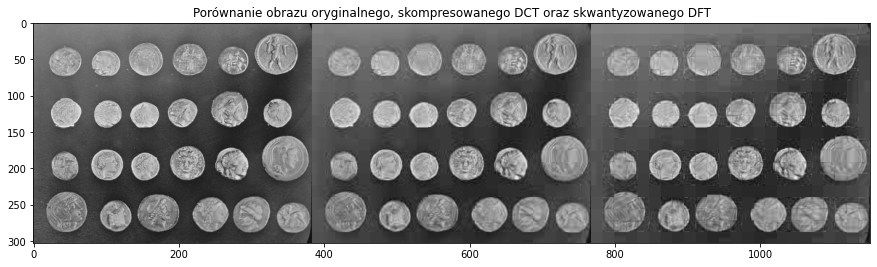

In [112]:
percent_nonzeros_dft_2 = np.sum( dft_thresh_2 != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print ("Pozostało %f%% współczynnikó DCT" % (percent_nonzeros_2*100.0))
print ("Pozostało %f%% współczynników DFT" % (percent_nonzeros_dft_2*100.0))


plt.figure()
plt.figsize=(25,15)
plt.title("Porównanie obrazu oryginalnego, skompresowanego DCT oraz skwantyzowanego DFT" )
plt.imshow( np.hstack( (im, im_dct_2, abs(im_dft_2)) ) ,cmap='gray')

Zauważamy, że liczba współczynników transformaty dla DCT jest mniejsza niżeli dla DFT.

Jesteśmy w stanie zauważyć, że obrazy po skompresowaniu są mniej wyraźne. Najłatwiej jest to zauważyć w lewym dolnym rogu - twarzy na monecie. 

Następnie dla bloku 8x8 zmieniamy próg na znacznie większy.

Text(0.5, 1.0, 'Progowe 8x8 DCT obrazu')

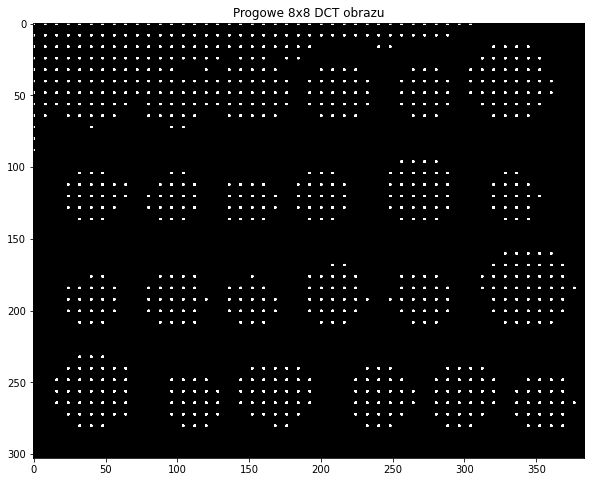

In [119]:
imsize = im.shape
dct_3 = np.zeros(imsize)
im_dct_3 = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct_3[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

thresh = 0.5
dct_thresh_3 = dct_3 * (abs(dct_3) > (thresh*np.max(dct_3)))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct_3[i:(i+8),j:(j+8)] = idct2( dct_thresh_3[i:(i+8),j:(j+8)] )

percent_nonzeros_3 = np.sum( dct_thresh_3 != 0.0 ) / (imsize[0]*imsize[1]*1.0)

#Display entire DCT
plt.figure()
plt.imshow(dct_thresh_3,cmap='gray',vmax = np.max(dct_3)*0.01,vmin = 0)
plt.title( "Progowe 8x8 DCT obrazu")
     

Text(0.5, 1.0, '8x8 DFT obrazu')

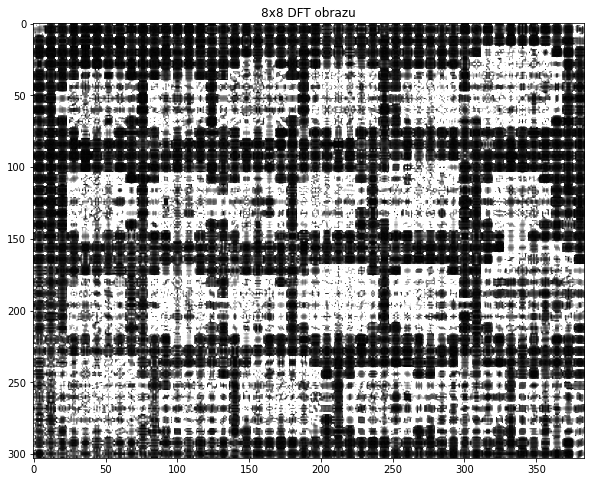

In [120]:
dft_3 = zeros(imsize,dtype='complex');
im_dft_3 = zeros(imsize,dtype='complex');

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft_3[i:(i+8),j:(j+8)] = np.fft.fft2( im[i:(i+8),j:(j+8)] )

dft_thresh_3 = dft_3 * (abs(dft_3) > (thresh*np.max(abs(dft_3))))

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dft_3[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh_3[i:(i+8),j:(j+8)] )
        
percent_nonzeros_dft_3 = np.sum( dft_thresh_3 != 0.0 ) / (imsize[0]*imsize[1]*1.0)

plt.figure()
plt.imshow(abs(dft_3),cmap='gray',vmax= np.max(abs(dft_3))*0.01,vmin = 0)
plt.title( "8x8 DFT obrazu")

Pozostało 0.679834% współczynników DCT
Pozostało 0.679834% współczynników DFT


Text(0.5, 1.0, 'Porównanie obrazu oryginalnego, skompresowanego DCT oraz skwantyzowanego DFT')

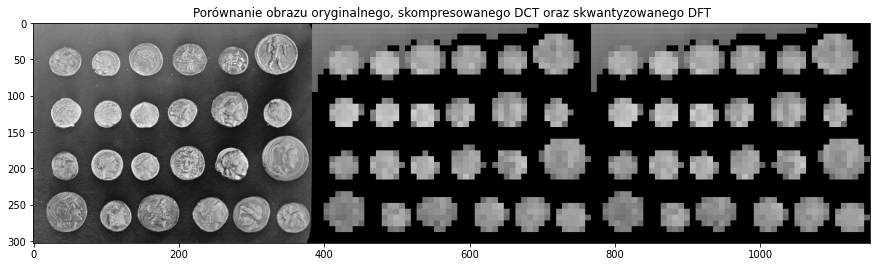

In [121]:

print ("Pozostało %f%% współczynników DCT" % (percent_nonzeros_3*100.0))
print ("Pozostało %f%% współczynników DFT" % (percent_nonzeros_dft_3*100.0))

plt.figure()
plt.imshow( np.hstack( (im, im_dct_3, abs(im_dft_3) )) ,cmap='gray')
plt.title("Porównanie obrazu oryginalnego, skompresowanego DCT oraz skwantyzowanego DFT" )

Można zauważyć, że podnisienie progu powoduje zmniejszenie się ilości współczynników transformaty (procentowa ilość współczynników zmniejszyła z ok. 6% do ok. 0.6%). Przez ten fakt obraz jest znacznie bardziej rozmyty - ponieważ tracimy znacznie więcej informacji obraz znacznie różni się od poprzednich wersji.

Natomiast dopiero obrazach przed przepuszczeniem ich przez transformatę odwrotną możemy zauważyć znaczną różnicę. Obraz po transformacie cosinusowej jest złożony z jasnych pojedynczych punktów, natomiast obraz po transformacie Fouriera ma znacznie więcej jasnych miejsc w różnych odcieniach szarości.